In [1]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
from bokeh.plotting import output_file
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()

cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
cmd_folder = os.getenv("SESNCFAlib") + "/templates"
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from savgol import savitzky_golay
from snclasses import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

In [2]:
SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']
bands = ['U','B','V', 'g', 'R', 'I', 'rp','ip','up','J','H','K','m2','w1','w2']
colorTypes = {'IIb':'FireBrick',
             'Ib':'SteelBlue',
             'Ic':'DarkGreen',
             'Ic-bl':'DarkOrange',
             'Ibn':'purple'}

In [3]:
font = {'family' : 'normal',
        'size'   : 20}

pl.rc('font', **font)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams["axes.labelweight"] = "normal"
# plt.rcParams['font.weight'] = 'normal'



In [4]:
del_m_15 = []
del_m__15 = []
tmpl = {}

In [5]:
lim = 100
for bb in bands:
#     print(bb)
    tmpl[bb] = {}
    tmpl[bb]['Ibc'] = {}
    
    templatePkl = "ubertemplates/UberTemplate_%s.pkl"%(bb)
    
    with open(templatePkl, 'rb') as f:
        u = pkl._Unpickler(f)
        u.encoding = 'latin1'
        tmpl_ = u.load()
        
    tmpl[bb]['Ibc'] = tmpl_
    
    down = -1*tmpl_['pc25'][:len(tmpl_['med_smoothed'])]
    up = -1*tmpl_['pc75'][:len(tmpl_['med_smoothed'])]
    
    
    med = -1*tmpl_['med_smoothed']
#     tmpl_['phs'] = tmpl_['phs'][tmpl_['phs']<lim]
    phs = tmpl_['epochs_med']
    
#     phs = np.zeros(len(tmpl_['med_smoothed']))
    
    lim_zero = phs[np.argmin(np.abs((phs)))]
    lim_10 = phs[np.argmin(np.abs((phs)-10))]
    lim_neg_10 = phs[np.argmin(np.abs((phs)+10))]
    lim_15 = phs[np.argmin(np.abs((phs)-15))]
    lim_neg_15 = phs[np.argmin(np.abs((phs)+15))]
    
    
    tmpl[bb]['Ibc']['del_m_15'] = [[],[]]
    tmpl[bb]['Ibc']['del_m_upper_15'] = [[],[]]
    tmpl[bb]['Ibc']['del_m_lower_15'] = [[],[]]

    tmpl[bb]['Ibc']['del_m_10'] = [[],[]]
    tmpl[bb]['Ibc']['del_m_upper_10'] = [[],[]]
    tmpl[bb]['Ibc']['del_m_lower_10'] = [[],[]]

    tmpl[bb]['Ibc']['del_m_10'][0].append(med[phs==lim_zero][0] - med[phs==lim_10][0])
    tmpl[bb]['Ibc']['del_m_10'][1].append(med[phs==lim_zero][0] - med[phs==lim_neg_10][0] )

    tmpl[bb]['Ibc']['del_m_upper_10'][0].append(up[phs==lim_zero][0] - up[phs==lim_10][0])
    tmpl[bb]['Ibc']['del_m_upper_10'][1].append(up[phs==lim_zero][0] - up[phs==lim_neg_10][0])

    tmpl[bb]['Ibc']['del_m_lower_10'][0].append(down[phs==lim_zero][0] - down[phs==lim_10][0])
    tmpl[bb]['Ibc']['del_m_lower_10'][1].append(down[phs==lim_zero][0] - down[phs==lim_neg_10][0])

    tmpl[bb]['Ibc']['del_m_15'][0].append(med[phs==lim_zero][0] - med[phs==lim_15][0])
    tmpl[bb]['Ibc']['del_m_15'][1].append(med[phs==lim_zero][0] - med[phs==lim_neg_15][0] )

    tmpl[bb]['Ibc']['del_m_upper_15'][0].append(up[phs==lim_zero][0] - up[phs==lim_15][0])
    tmpl[bb]['Ibc']['del_m_upper_15'][1].append(up[phs==lim_zero][0] - up[phs==lim_neg_15][0])

    tmpl[bb]['Ibc']['del_m_lower_15'][0].append(down[phs==lim_zero][0] - down[phs==lim_15][0])
    tmpl[bb]['Ibc']['del_m_lower_15'][1].append(down[phs==lim_zero][0] - down[phs==lim_neg_15][0])

    

In [6]:
SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']


for bb in bands:

    

    for SNTYPE in SNTYPES:
        
        tmpl[bb][SNTYPE] = {}

        try:
            path = "outputs/GPs_2022/GPalltemplfit_%s_%s_V0.pkl"%(SNTYPE,bb)
            tmpl_ = pkl.load(open(path, "rb"))
        except:
            continue
        
        
        
#         print(tmpl_['rollingMedian'])

        tmpl[bb][SNTYPE] = tmpl_
    
        if np.nansum(tmpl_['rollingMedian']) == 0:
            print(bb, SNTYPE)
            continue

        
        tmpl[bb][SNTYPE]['del_m_15'] = [[],[]]
        tmpl[bb][SNTYPE]['del_m_upper_15'] = [[],[]]
        tmpl[bb][SNTYPE]['del_m_lower_15'] = [[],[]]
        
        tmpl[bb][SNTYPE]['del_m_10'] = [[],[]]
        tmpl[bb][SNTYPE]['del_m_upper_10'] = [[],[]]
        tmpl[bb][SNTYPE]['del_m_lower_10'] = [[],[]]
        
        tmpl[bb][SNTYPE]['del_m_10'][0].append(tmpl_['rollingMedian'][tmpl_['t']==0.][0] - tmpl_['rollingMedian'][tmpl_['t']==10.][0])
        tmpl[bb][SNTYPE]['del_m_10'][1].append(tmpl_['rollingMedian'][tmpl_['t']==0.][0] - tmpl_['rollingMedian'][tmpl_['t']== -10.][0] )
       
        tmpl[bb][SNTYPE]['del_m_lower_10'][0].append(tmpl_['rollingPc75'][tmpl_['t']==0.][0] - tmpl_['rollingPc75'][tmpl_['t']==10.][0])
        tmpl[bb][SNTYPE]['del_m_lower_10'][1].append(tmpl_['rollingPc75'][tmpl_['t']==0.][0] - tmpl_['rollingPc75'][tmpl_['t']== -10.][0])
        
        tmpl[bb][SNTYPE]['del_m_upper_10'][0].append(tmpl_['rollingPc25'][tmpl_['t']==0.][0] - tmpl_['rollingPc25'][tmpl_['t']==10.][0])
        tmpl[bb][SNTYPE]['del_m_upper_10'][1].append(tmpl_['rollingPc25'][tmpl_['t']==0.][0] - tmpl_['rollingPc25'][tmpl_['t']== -10.][0])

        tmpl[bb][SNTYPE]['del_m_15'][0].append(tmpl_['rollingMedian'][tmpl_['t']==0.][0] - tmpl_['rollingMedian'][tmpl_['t']==15.][0])
        tmpl[bb][SNTYPE]['del_m_15'][1].append(tmpl_['rollingMedian'][tmpl_['t']==0.][0] - tmpl_['rollingMedian'][tmpl_['t']== -15.][0] )
       
        tmpl[bb][SNTYPE]['del_m_lower_15'][0].append(tmpl_['rollingPc75'][tmpl_['t']==0.][0] - tmpl_['rollingPc75'][tmpl_['t']==15.][0])
        tmpl[bb][SNTYPE]['del_m_lower_15'][1].append(tmpl_['rollingPc75'][tmpl_['t']==0.][0] - tmpl_['rollingPc75'][tmpl_['t']== -15.][0])
        
        tmpl[bb][SNTYPE]['del_m_upper_15'][0].append(tmpl_['rollingPc25'][tmpl_['t']==0.][0] - tmpl_['rollingPc25'][tmpl_['t']==15.][0])
        tmpl[bb][SNTYPE]['del_m_upper_15'][1].append(tmpl_['rollingPc25'][tmpl_['t']==0.][0] - tmpl_['rollingPc25'][tmpl_['t']== -15.][0])



        

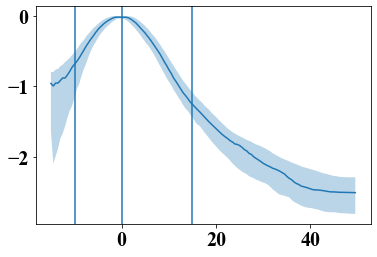

In [7]:
plt.plot(tmpl['B']['Ib']['phs'], tmpl['B']['Ib']['rollingMedian']) 
plt.fill_between(tmpl['B']['Ib']['phs'], tmpl['B']['Ib']['rollingPc25'],
                tmpl['B']['Ib']['rollingPc75'], alpha=0.3)
plt.axvline(0)
plt.axvline(15)
plt.axvline(-10)

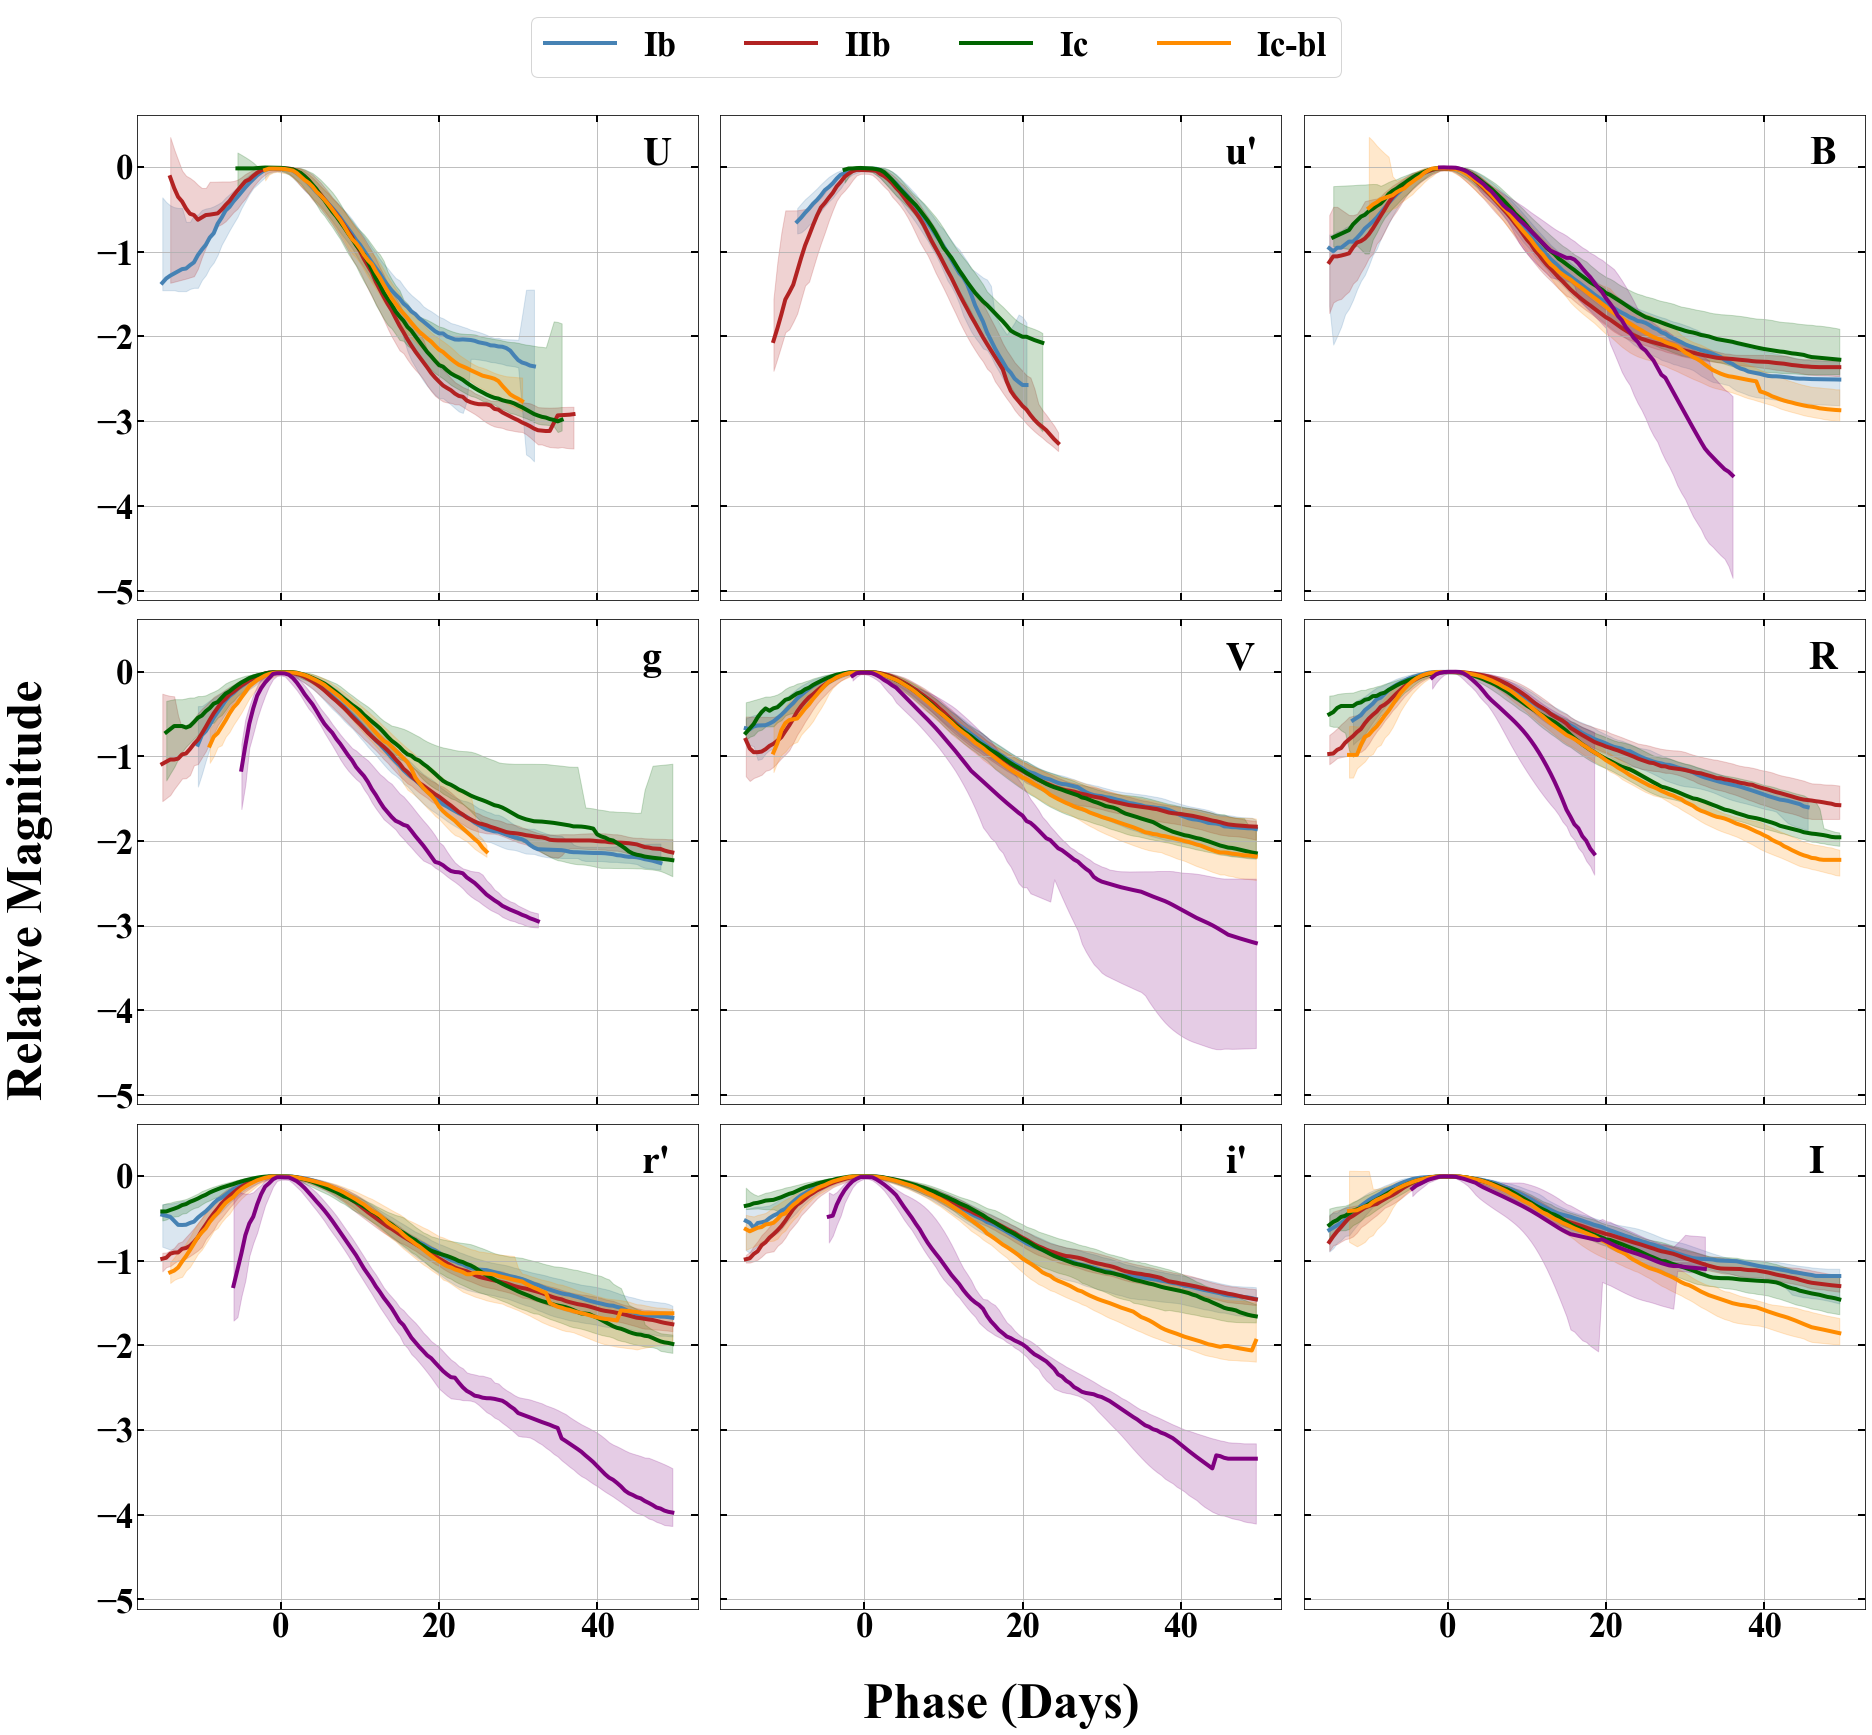

In [8]:
bb = ['U', 'u', 'B','g', 'V', 'R', 'r', 'i', 'I']
up_lim = 100

fig, ax = plt.subplots(3,3, sharex = True, sharey = True, figsize=(30,25))


for i,b in enumerate(bb):
    b_ = b
    for tp in SNTYPES:
        
        if b == 'i' or b == 'r' or b == 'u':
            b_ = b+ str("'")
            b = b + str('p')
            

        try:
            np.concatenate(ax)[i].plot(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                       tmpl[b][tp]['rollingMedian'][tmpl[b][tp]['t']<up_lim],\
                                       color = colorTypes[tp], label = tp, linewidth = 4)
            np.concatenate(ax)[i].fill_between(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                       tmpl[b][tp]['rollingPc25'][tmpl[b][tp]['t']<up_lim],\
                                       tmpl[b][tp]['rollingPc75'][tmpl[b][tp]['t']<up_lim],\
                                       color = colorTypes[tp],alpha=0.2)
        except:
            continue
        np.concatenate(ax)[i].tick_params(axis="both", direction="in", which="major",\
                                          right=True, top=True, size=7, labelsize=35, width = 2)
    
#     np.concatenate(ax)[i].legend(ncol=2,bbox_to_anchor=(0.5, -0.2),fancybox=False, prop={'size': 30})
    np.concatenate(ax)[i].grid()
    np.concatenate(ax)[i].text(0.9, 0.9, b_, transform=np.concatenate(ax)[i].transAxes, size = 40)

    np.concatenate(ax)[i].tick_params(axis="both", direction="in", which="major", right=True, top=True, size=7, labelsize=35, width = 2)

handles, labels = np.concatenate(ax)[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, prop={'size':35})


fig.text(0.5, 0.04, 'Phase (Days)', ha='center', size = 50)
fig.text(0.04, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 50)

plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=0.93, wspace=0.04, hspace=0.04)


fig.savefig('GP_tmpl_per_band_UVRIugri_2022_2.pdf',  bbox_inches='tight')

In [69]:
tmpl['w2'].keys()

dict_keys(['Ibc', 'Ib', 'IIb', 'Ic', 'Ic-bl', 'Ibn'])

J
Ib
IIb
Ic
Ic-bl
Ibn
K
Ib
IIb
Ic
Ic-bl
Ibn
H
Ib
IIb
Ic
Ic-bl
Ibn
w1
Ib
IIb
Ic
Ic-bl
Ibn


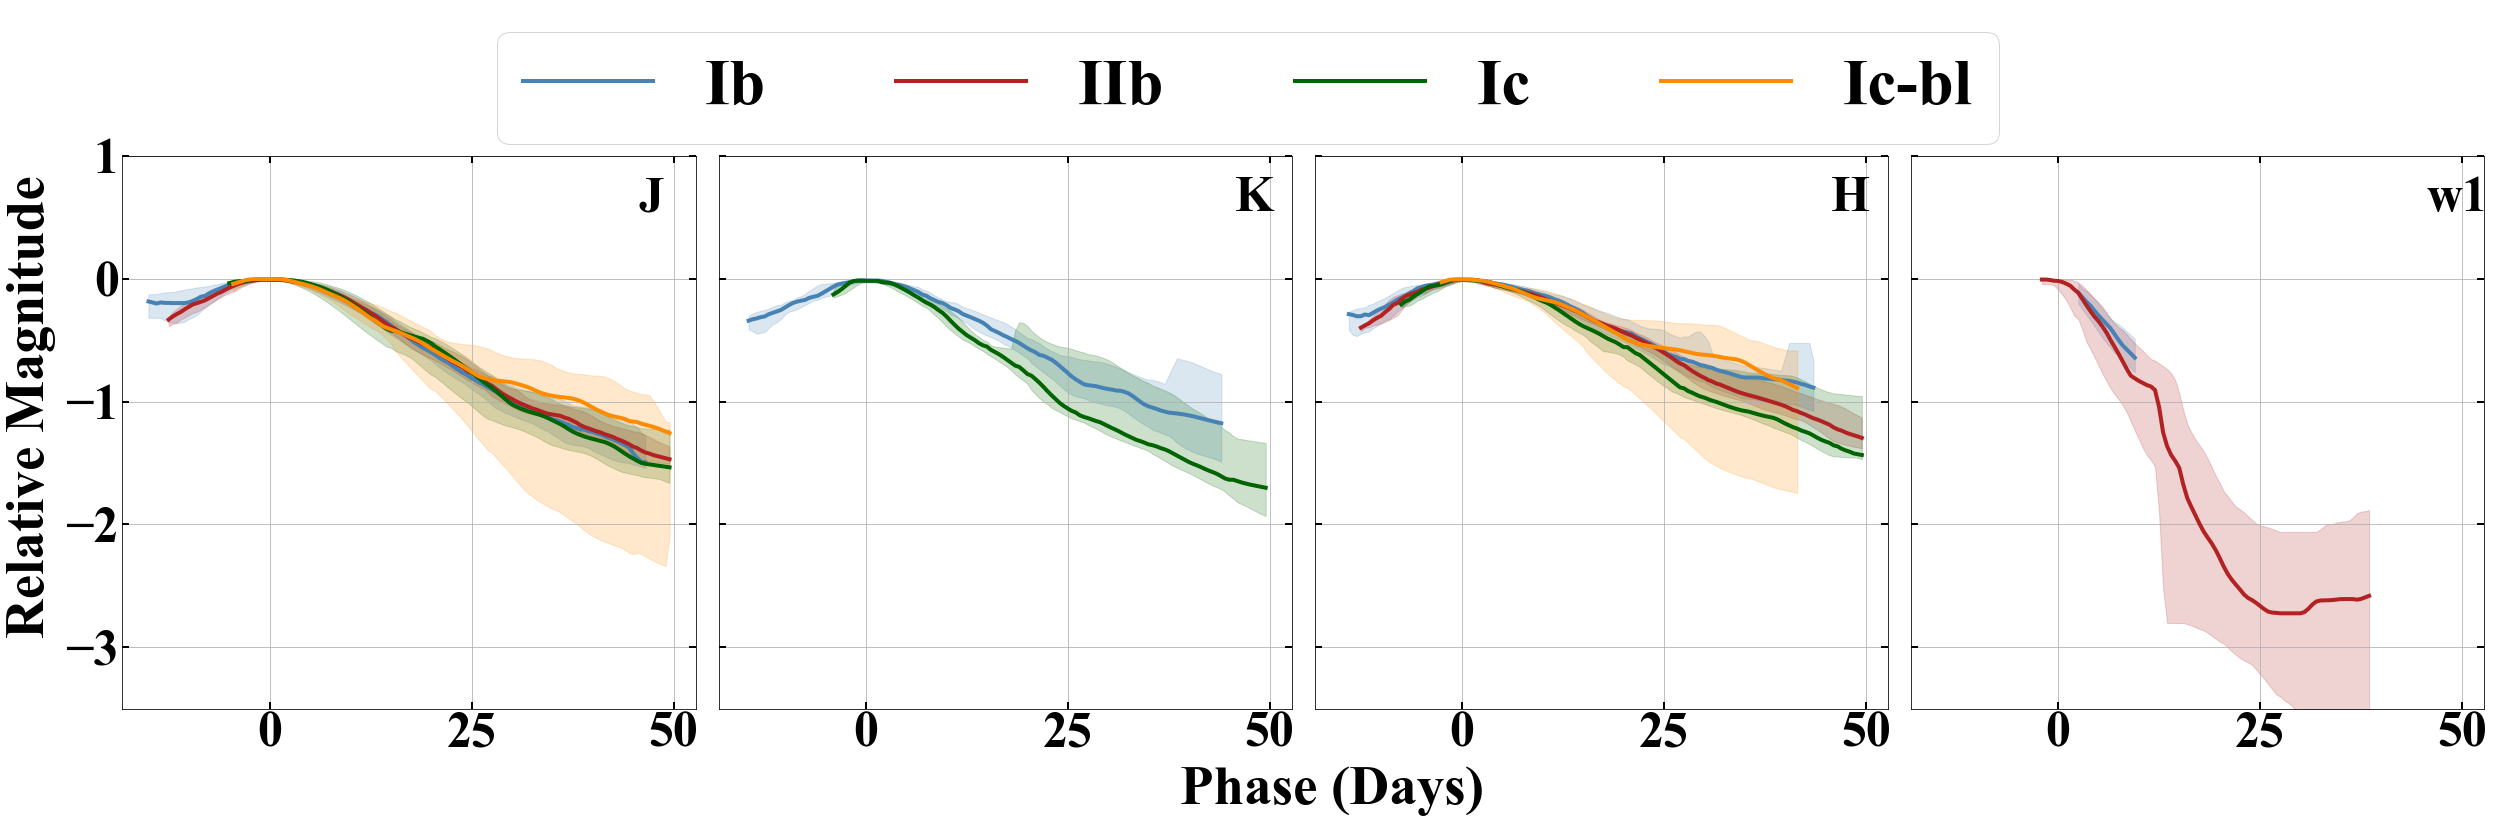

In [9]:
bb = ['J','K', 'H', 'w1', 'w2', 'm2']
up_lim = 100
fig, ax = plt.subplots(1,4, sharex = True, sharey = True, figsize=(40,12))


for i,b in enumerate(bb[0:4]):
    print(b)
    b_ = b
    for tp in SNTYPES:
        print(tp)
        
        if b == 'i' or b == 'r' or b == 'u':
            b_ = b+ str("'")
            b = b + str('p')
            
        if len(tmpl[b][tp].keys()) == 0:
            continue
            

#         try:
        ax[i].plot(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingMedian'][tmpl[b][tp]['t']<up_lim],\
                                   color = colorTypes[tp], label = tp, linewidth = 4)
        ax[i].fill_between(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingPc25'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingPc75'][tmpl[b][tp]['t']<up_lim],\
                                   color = colorTypes[tp],alpha=0.2)
#         except:
#             continue
        ax[i].tick_params(axis="both", direction="in", which="major",\
                                          right=True, top=True, size=7, labelsize=50, width = 2)
    
#     np.concatenate(ax)[i].legend(ncol=2,loc = 'lower left', prop={'size': 30})

    
#     if i == 0:
#         handles, labels = np.concatenate(ax)[i].get_legend_handles_labels()
        
#     if i == 4 or i == 5:
#         np.concatenate(ax)[i].set_axis_off()
#         if  i==4:
#             legend = np.concatenate(ax)[i].legend(handles, labels, loc='center left', ncol=5, prop={'size':35})
#     else:

    
    ax[i].grid()
    ax[i].text(0.9, 0.9, b_, transform=ax[i].transAxes, size = 50)
    ax[i].set_ylim([ -3.5, 1])

handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, prop={'size':65})

fig.text(0.5, 0.04, 'Phase (Days)', ha='center', size = 55)
fig.text(0.04, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 55)

plt.subplots_adjust(left=0.08, bottom=0.15, right=None, top=0.79, wspace=0.04, hspace=0.04)

fig.savefig('GP_tmpl_per_band_JKHw1w2m2_2022_2.pdf',  bbox_inches='tight')

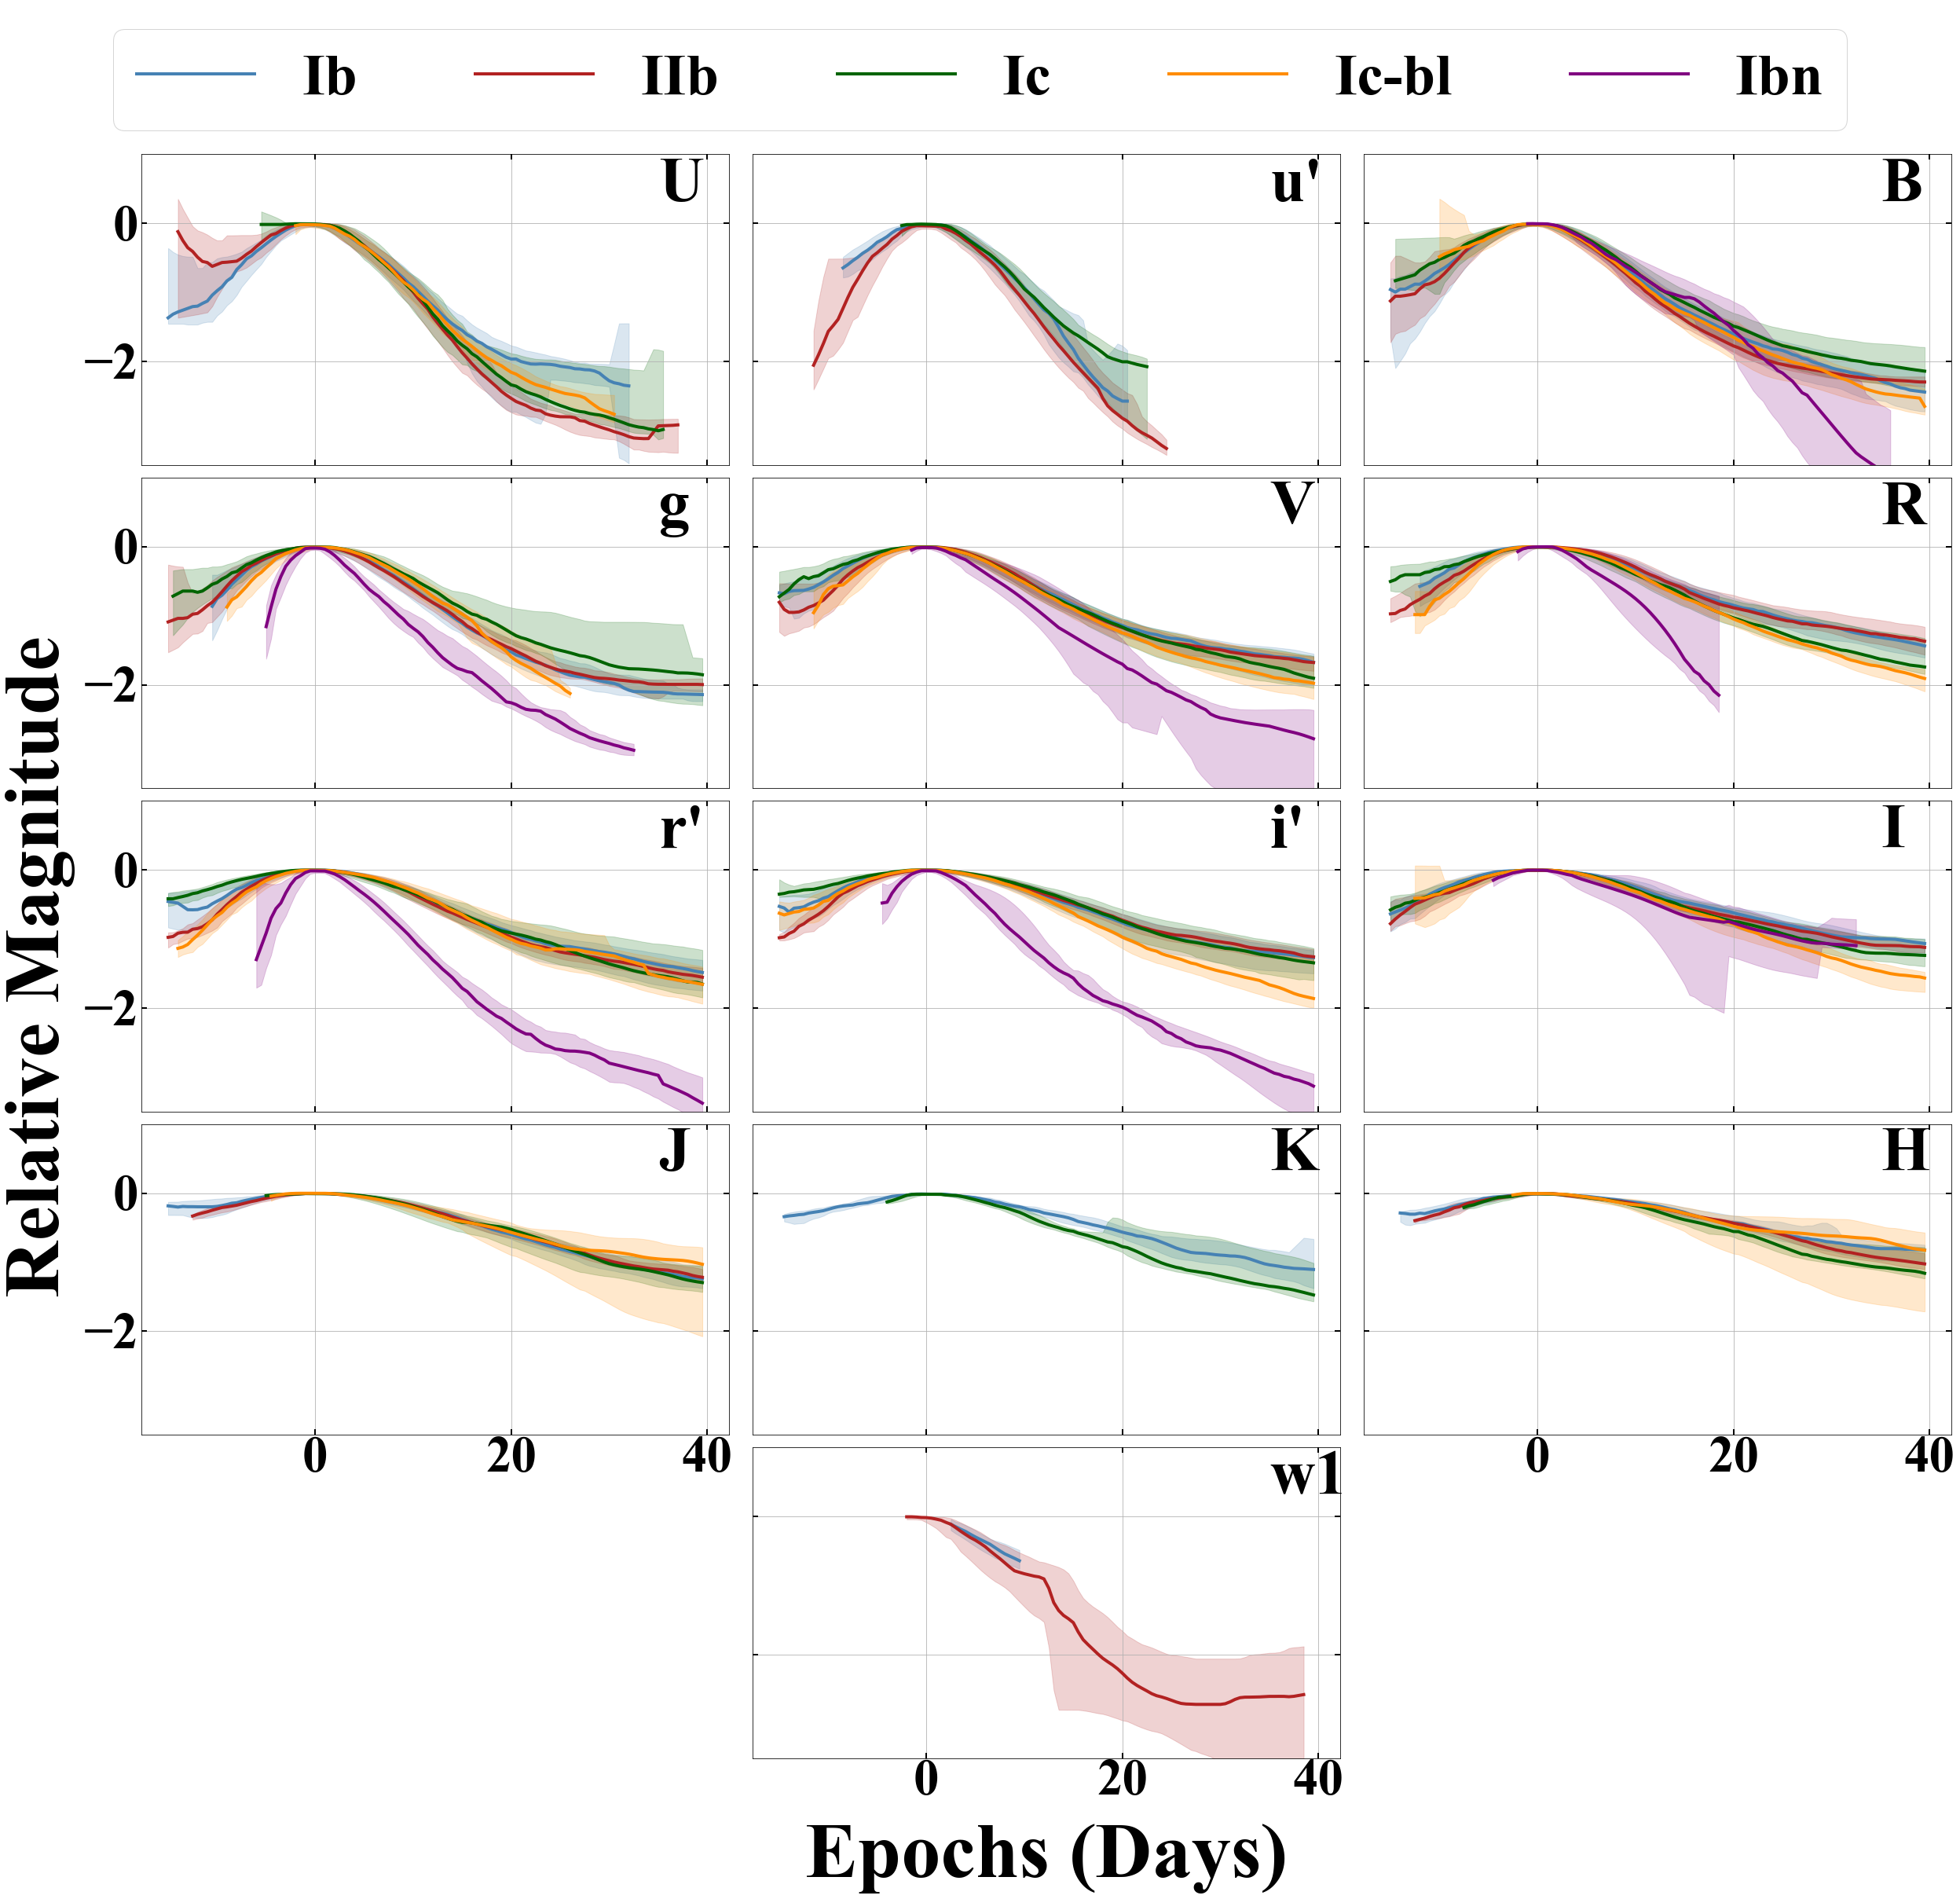

In [26]:
bb = ['U', 'u', 'B','g', 'V', 'R', 'r', 'i', 'I', 'J','K', 'H', 'w1']
up_lim = 40

fig, ax = plt.subplots(5,3, sharex = True, sharey = True, figsize=(40,35))


for i,b in enumerate(bb):
#     print(b)
    b_ = b
    
    if b == 'w1':
        i = i+1
    for tp in SNTYPES:
#         print(tp)
        
        if b == 'i' or b == 'r' or b == 'u':
            b_ = b+ str("'")
            b = b + str('p')
            
        if len(tmpl[b][tp].keys()) == 0:
            continue
            


        np.concatenate(ax)[i].plot(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingMedian'][tmpl[b][tp]['t']<up_lim],\
                                   color = colorTypes[tp], label = tp, linewidth = 4)
        np.concatenate(ax)[i].fill_between(tmpl[b][tp]['t'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingPc25'][tmpl[b][tp]['t']<up_lim],\
                                   tmpl[b][tp]['rollingPc75'][tmpl[b][tp]['t']<up_lim],\
                                   color = colorTypes[tp],alpha=0.2)
        np.concatenate(ax)[i].tick_params(axis="both", direction="in", which="major",\
                                          right=True, top=True, size=7, labelsize=35, width = 2)
    
#     np.concatenate(ax)[i].legend(ncol=2,bbox_to_anchor=(0.5, -0.2),fancybox=False, prop={'size': 30})
    np.concatenate(ax)[i].grid()
    np.concatenate(ax)[i].text(0.88, 0.85, b_, transform=np.concatenate(ax)[i].transAxes, size = 80)

    np.concatenate(ax)[i].set_ylim([ -3.5, 1])
    np.concatenate(ax)[i].tick_params(axis="both", direction="in", which="major", right=True, top=True, size=7, labelsize=65, width = 2)
    

np.concatenate(ax)[9].tick_params(axis='both', which='both', labelsize=65, labelbottom=True)
np.concatenate(ax)[11].tick_params(axis='both', which='both', labelsize=65, labelbottom=True)
np.concatenate(ax)[12].set_axis_off()
np.concatenate(ax)[14].set_axis_off()



handles, labels = np.concatenate(ax)[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, prop={'size':75})


fig.text(0.5, 0.04, 'Epochs (Days)', ha='center', size = 100)
fig.text(0.04, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 100)

plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=0.91, wspace=0.04, hspace=0.04)


fig.savefig('GP_tmpl_per_band_UVRIugriJKHw1w2m2_2022_poster.pdf',  bbox_inches='tight')

In [71]:
from itertools import combinations

bb = ['U', 'g','V', 'rp', 'ip']#,'K']
epochs = [-10, -5, 0, 15, 30]

colors = {}    

for tp in SNTYPES:
    colors[tp] = {}
    
    
    for i in list(combinations(bb, 2)):
        
        colors[tp]['%s_%s' % (i[0],i[1])] = []
        colors[tp]['%s_%s_25' % (i[0],i[1])] = []
        colors[tp]['%s_%s_75' % (i[0],i[1])] = []
        colors[tp]['%s_%s_err' % (i[0],i[1])] = []
        
        for epoch in epochs:
            
            if len(tmpl[i[0]][tp]) == 0 or len(tmpl[i[1]][tp]) == 0:
                continue
            
            colors[tp]['%s_%s' % (i[0],i[1])].append(tmpl[i[0]][tp]['rollingMedian'][tmpl[i[0]][tp]['t']== epoch][0]-
                                                    tmpl[i[1]][tp]['rollingMedian'][tmpl[i[1]][tp]['t']== epoch][0])
            temp_25 = tmpl[i[0]][tp]['rollingPc25'][tmpl[i[0]][tp]['t']== epoch][0]-\
                                                    tmpl[i[1]][tp]['rollingPc75'][tmpl[i[1]][tp]['t']== epoch][0]
            colors[tp]['%s_%s_25' % (i[0],i[1])].append(temp_25)
            temp_75 = tmpl[i[0]][tp]['rollingPc75'][tmpl[i[0]][tp]['t']== epoch][0]-\
                                                    tmpl[i[1]][tp]['rollingPc25'][tmpl[i[1]][tp]['t']== epoch][0]
            colors[tp]['%s_%s_75' % (i[0],i[1])].append(temp_75)
            colors[tp]['%s_%s_err' % (i[0],i[1])].append(temp_75 - temp_25)
            

10


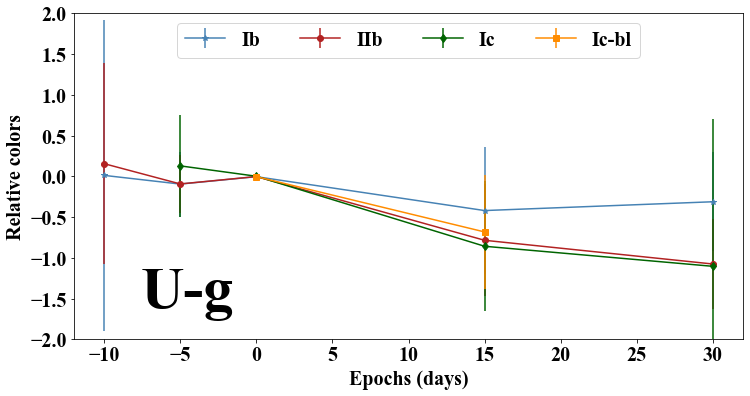

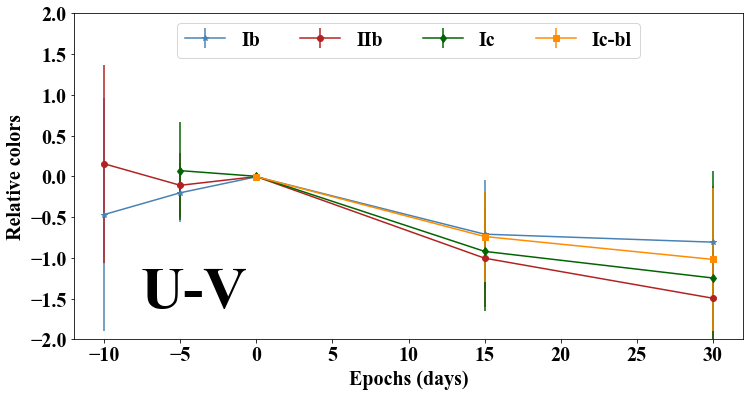

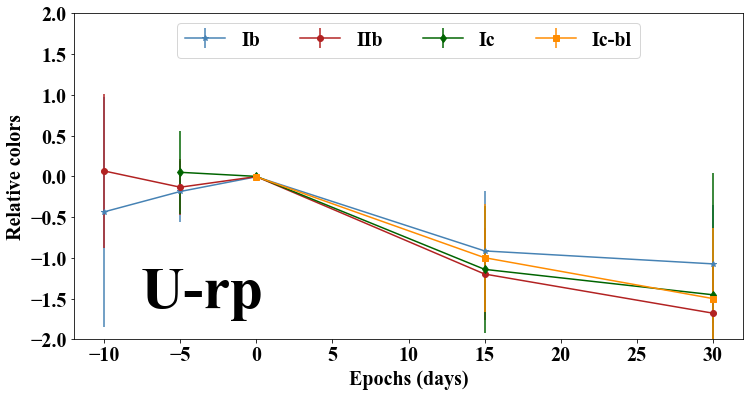

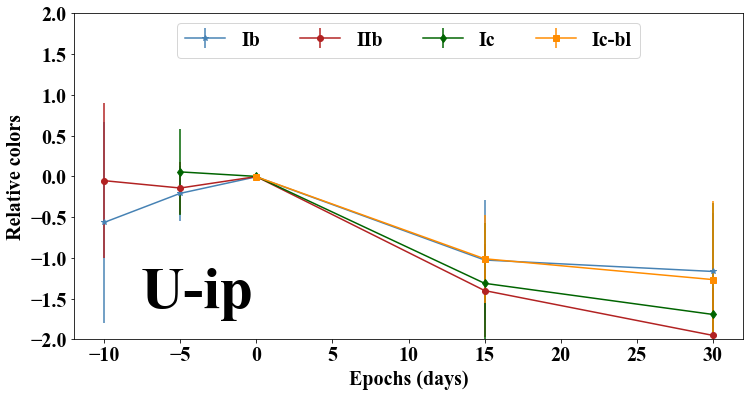

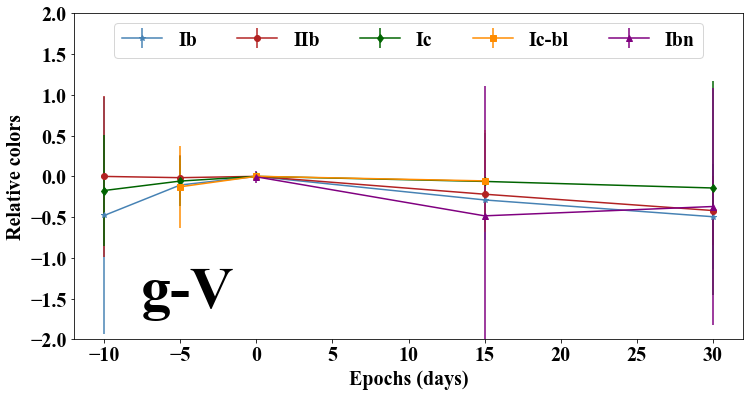

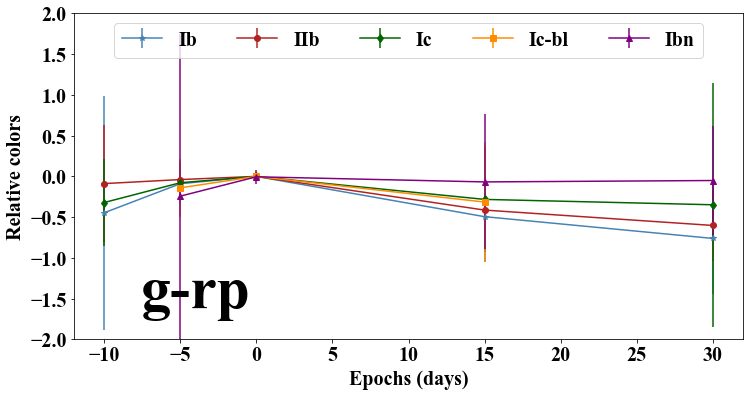

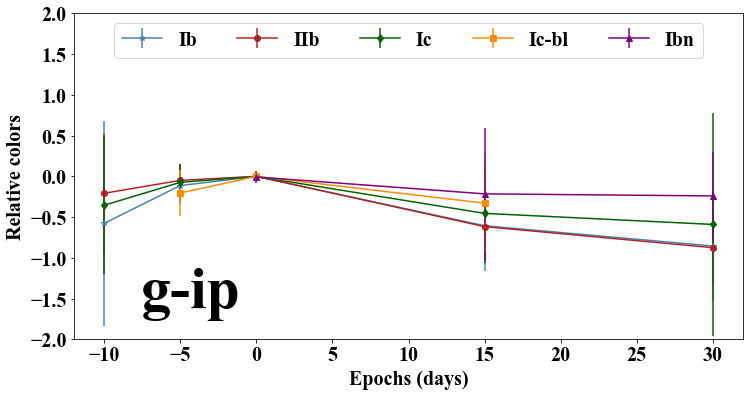

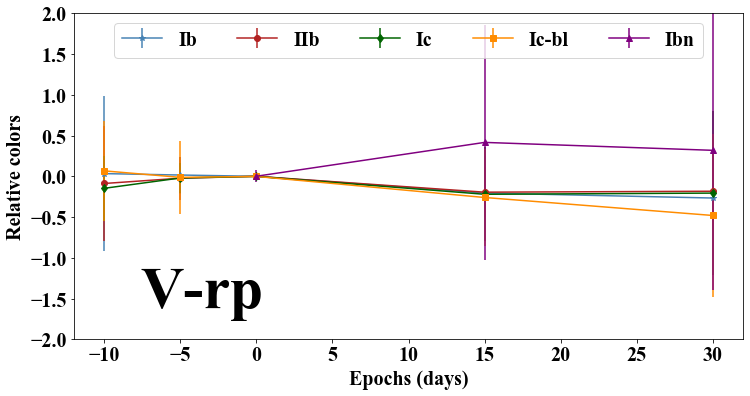

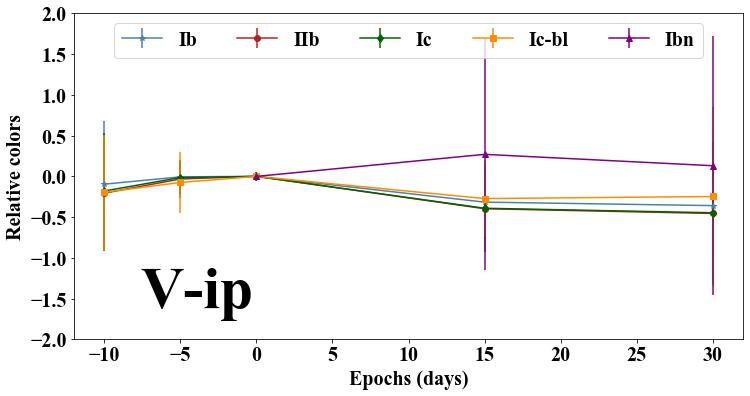

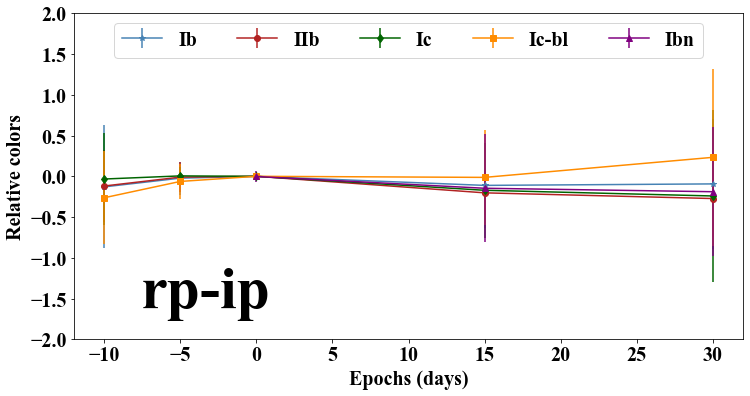

In [72]:
markers = ["*", "o", "d", "s", "^"]

c = 0
for i in list(combinations(bb, 2)):
    plt.figure(figsize=(12,6))
    
    for j, tp in enumerate(SNTYPES):
        if len(colors[tp]['%s_%s' % (i[0],i[1])]) == 0:
            continue
        
        
        plt.errorbar(epochs, colors[tp]['%s_%s' % (i[0],i[1])],
                      yerr = colors[tp]['%s_%s_err' % (i[0],i[1])],
                     marker = markers[j], color = colorTypes[tp], label = tp)
    c = c + 1
        
#     plt.title('%s-%s' % (i[0],i[1])+' evolution of SESNe of different types ')
    plt.text(0.1, 0.1, '%s-%s' % (i[0],i[1]), size=60, transform=plt.gca().transAxes)
    plt.xlabel('Epochs (days)')
    plt.ylabel('Relative colors')
    plt.ylim(-2,2)
    plt.legend(ncol=5, loc= 'upper center')
    plt.savefig('outputs/GPs_2022/compare_gp_tmpls/color_evolution_%s-%s' % (i[0],i[1]) + '_2.pdf')
print(c)

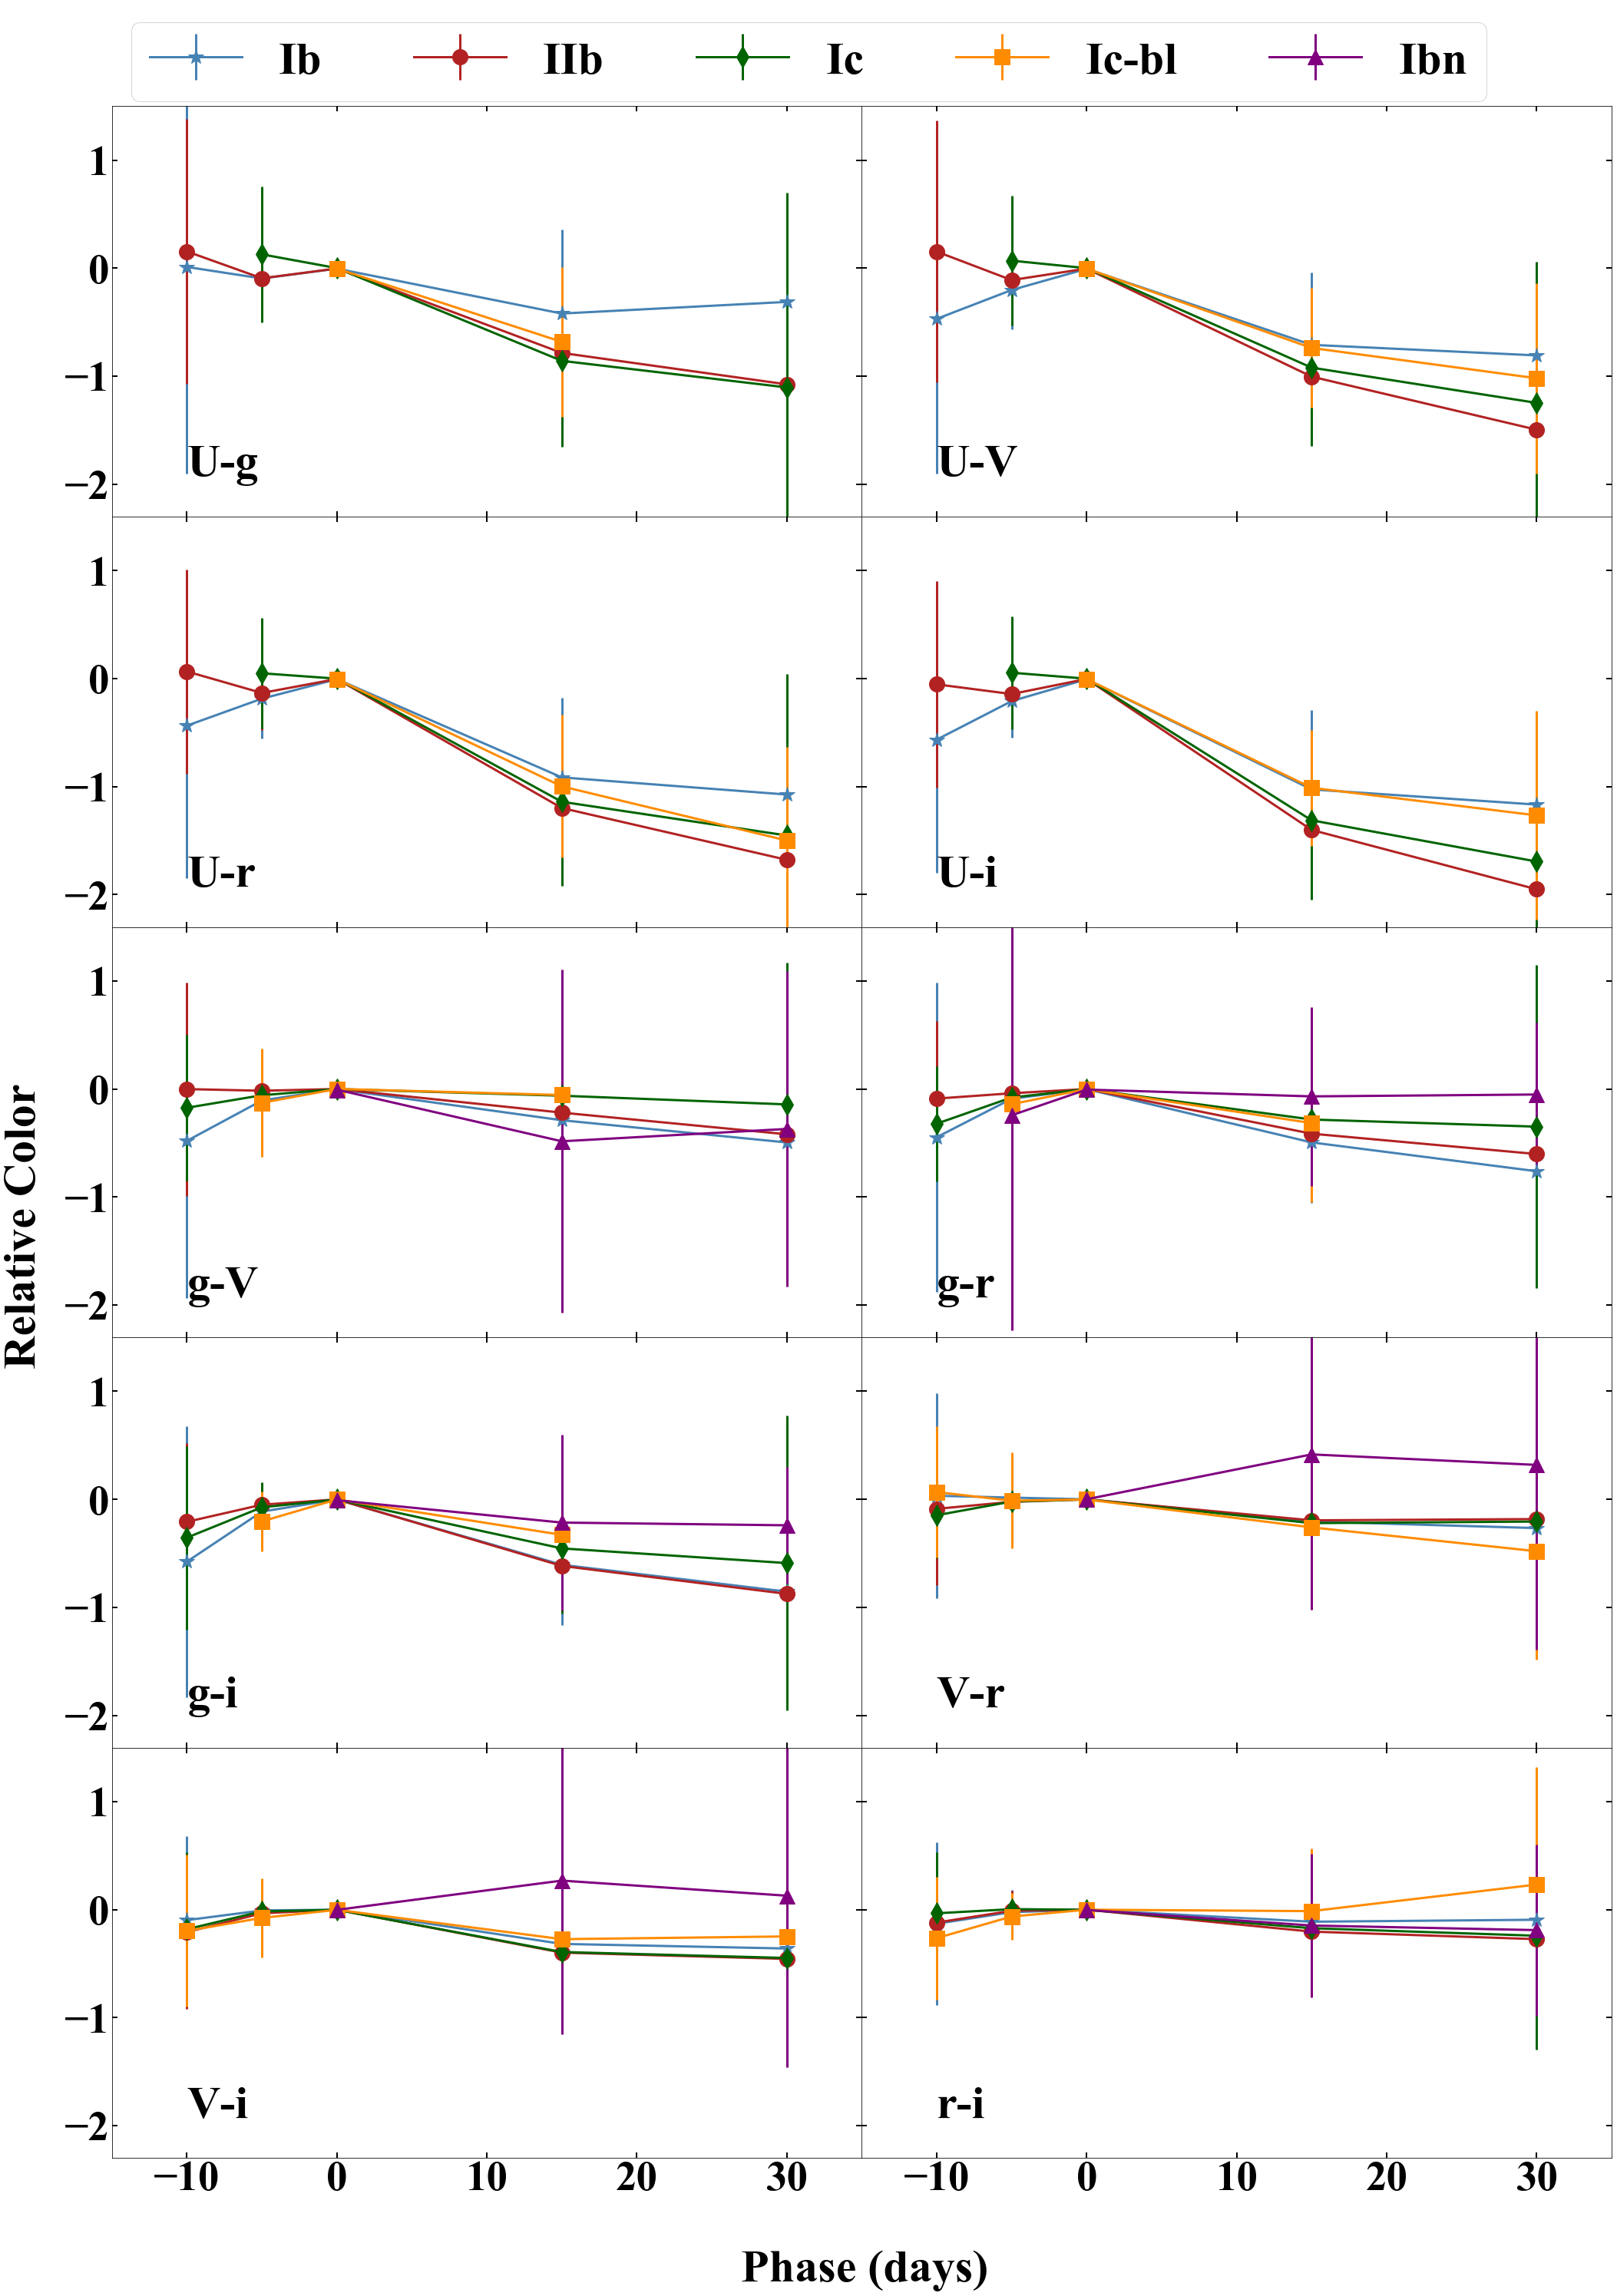

In [73]:
markers = ["*", "o", "d", "s", "^"]

fig, axs = plt.subplots(5, 2, figsize=(35,45), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace = 0, top = 0.95)

for k, i in enumerate(list(combinations(bb, 2))):
    
    
    for j, tp in enumerate(SNTYPES):
        if len(colors[tp]['%s_%s' % (i[0],i[1])]) == 0:
            continue
        
        
        axs.flatten()[k].errorbar(epochs, colors[tp]['%s_%s' % (i[0],i[1])],
                      yerr = colors[tp]['%s_%s_err' % (i[0],i[1])],
                     marker = markers[j], color = colorTypes[tp], label = tp,
                    linewidth = 3, markersize = 20)
        
#     plt.title('%s-%s' % (i[0],i[1])+' evolution of SESNe of different types ')
    if i[0] in ['up', 'rp', 'ip']:
        i1 = i[0].split('p')[0]
    else:
        i1 = i[0]
        
    if i[1] in ['up', 'rp', 'ip']:
        i2 = i[1].split('p')[0]
    else:
        i2 = i[1]
        
    axs.flatten()[k].text(0.1, 0.1, '%s-%s' % (i1, i2), size = 60, transform = axs.flatten()[k].transAxes)
    axs.flatten()[k].set_ylim((-2,2))
    axs.flatten()[k].tick_params(axis="both", direction="in", which="major", right=True, top=True, size=7, labelsize=35, width = 2)
#     axs.flatten()[k].set_yticklabels(['', '-1', '-0.5', '0', '0.5', '1', ''])
    if k%2 != 0:
        axs.flatten()[k].tick_params(axis="y", which="both", right=True, left=True, labelleft=False)
    else:
        axs.flatten()[k].tick_params(axis="y", direction="in", which="major", left=True, size=7, labelsize=55, width = 2)
        
    if k == 8 or k == 9:
        axs.flatten()[k].tick_params(axis="x", direction="in", which="major", top=True, size=7, labelsize=55, width = 2)
    else:
        axs.flatten()[k].tick_params(axis="x", which="both", top=True, labelbottom = False)
    
    axs.flatten()[k].set_ylim((-2.3,1.5))
    axs.flatten()[k].set_xlim((-15,35))
        
fig.text(0.07, 0.5, 'Relative Color', va='center', rotation='vertical', size=60)
fig.text(0.45, 0.08, 'Phase (days)', va='center', size=60)
handles, labels = axs.flatten()[-1].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 5, loc='upper center', prop={'size': 60})
        
#     plt.legend(ncol=5, loc= 'upper center')
fig.savefig('outputs/GPs_2022/compare_gp_tmpls/color_evolution_2.pdf')


In [20]:
colors_5.to_latex('colors_at_minus_5.tex')

NameError: name 'colors_5' is not defined

In [56]:
SNTYPES = ['Ibc','Ib','IIb','Ic','Ic-bl', 'Ibn']


d = {} #{'del_m 15 in R':[],'del_m 15 in V':[],'del_m 15 in rp':[],'del_m 15 in g':[],'del_m 15 in U':[],'del_m 15 in up':[],'del_m 15 in J':[],'del_m 15 in B':[],'del_m 15 in H':[],'del_m 15 in I':[],'del_m 15 in ip':[],'del_m 15 in K':[],'del_m 15 in m2':[],'del_m 15 in w1':[],'del_m 15 in w2':[],\
#      'del_m -15 in R':[],'del_m -15 in V':[],'del_m -15 in rp':[],'del_m -15 in g':[],'del_m -15 in U':[],'del_m -15 in up':[],'del_m -15 in J':[],'del_m -15 in B':[],'del_m -15 in H':[],'del_m -15 in I':[],'del_m -15 in ip':[],'del_m -15 in K':[],'del_m -15 in m2':[],'del_m -15 in w1':[],'del_m -15 in w2':[]}

for bb in bands:
    if bb in ['ip','rp', 'up']:
        bb_ = bb.split('p')[0]+"'"
    else:
        bb_ = bb
    d['${\Delta m}_{15}$ in '+str(bb_)] = []
    

for SNTYPE in SNTYPES:
    for bb in bands:

        if bb in ['ip','rp', 'up']:
            bb_ = bb.split('p')[0]+"'"
        else:
            bb_ = bb
            
        if SNTYPE == 'Ibc':
            tmpl_ = tmpl[bb]['Ibc']
            med = -1*tmpl_['spl_med'](tmpl_['phs'])

            if np.nansum(med) == 0:
                d['${\Delta m}_{15}$ in '+str(bb_)].append(np.nan)
                continue
        else:
            med_ = 'rollingMedian'
            
            if len(tmpl[bb][SNTYPE]) == 0:
                d['${\Delta m}_{15}$ in '+str(bb_)].append(np.nan)
                continue
        
            if np.nansum(tmpl[bb][SNTYPE][med_]) == 0:
                d['${\Delta m}_{15}$ in '+str(bb_)].append(np.nan)
                continue
   
        if not np.isnan(tmpl[bb][SNTYPE]['del_m_15'][0][0]):
            d['${\Delta m}_{15}$ in '+str(bb_)].append('$'+str(np.round(tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+'^{'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_upper_15'][0][0]-tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+'}_{+'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_lower_15'][0][0]-tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+ '}$')
        else:
            d['${\Delta m}_{15}$ in '+str(bb_)].append(tmpl[bb][SNTYPE]['del_m_15'][1][0])

for bb in bands:
    if bb in ['ip','rp', 'up']:
        bb_ = bb.split('p')[0]+"'"
    else:
        bb_ = bb
    d['${\Delta m}_{-15}$ in '+str(bb_)] = []
    
for SNTYPE in SNTYPES:
    for bb in bands:
        if bb in ['ip','rp', 'up']:
            bb_ = bb.split('p')[0]+"'"
        else:
            bb_ = bb
        
        if SNTYPE == 'Ibc':
            tmpl_ = tmpl[bb]['Ibc']
            med = -1*tmpl_['spl_med'](tmpl_['phs'])
#             lim_zero = tmpl_['phs'][np.argmin(np.abs((tmpl_['phs'])))]
#             lim_10 = tmpl_['phs'][np.argmin(np.abs((tmpl_['phs'])-10))]
#             lim_neg_10 = tmpl_['phs'][np.argmin(np.abs((tmpl_['phs'])+10))]
#             lim_15 = tmpl_['phs'][np.argmin(np.abs((tmpl_['phs'])-15))]
#             lim_neg_15 = tmpl_['phs'][np.argmin(np.abs((tmpl_['phs'])+15))]
#             med_ = 
            if np.nansum(med) == 0:
                d['${\Delta m}_{-15}$ in '+str(bb_)].append(np.nan)
                continue
        else:
            med_ = 'rollingMedian'
            
            if len(tmpl[bb][SNTYPE]) == 0:
                d['${\Delta m}_{-15}$ in '+str(bb_)].append(np.nan)
                continue
        
            if np.nansum(tmpl[bb][SNTYPE][med_]) == 0:
                d['${\Delta m}_{-15}$ in '+str(bb_)].append(np.nan)
                continue
            
        if not np.isnan(tmpl[bb][SNTYPE]['del_m_15'][1][0]):
            d['${\Delta m}_{-15}$ in '+str(bb_)].append('$'+str(np.round(tmpl[bb][SNTYPE]['del_m_15'][1][0],2))+'^{'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_upper_15'][1][0]-tmpl[bb][SNTYPE]['del_m_15'][1][0],2))+'}_{+'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_lower_15'][1][0]-tmpl[bb][SNTYPE]['del_m_15'][1][0],2))+ '}$')
        else:
            d['${\Delta m}_{-15}$ in '+str(bb_)].append(tmpl[bb][SNTYPE]['del_m_15'][1][0])

        
del_m = pd.DataFrame(data = d, index=SNTYPES)
del_m = del_m.transpose().dropna(how = 'all')
# del_m.fillna('---').to_latex('del_m.tex', escape = False)

In [57]:
del_m.fillna('---')



,Ibc,Ib,IIb,Ic,Ic-bl,Ibn
${\Delta m}_{15}$ in U,$2.01^{0.1}_{+-0.52}$,$1.54^{0.3}_{+-0.16}$,$1.88^{0.22}_{+-0.2}$,$1.78^{0.19}_{+-0.26}$,$1.65^{0.17}_{+-0.12}$,---
${\Delta m}_{15}$ in B,$1.43^{0.08}_{+-0.18}$,$1.24^{0.19}_{+-0.14}$,$1.4^{0.08}_{+-0.1}$,$1.14^{0.24}_{+-0.16}$,$1.28^{0.25}_{+-0.11}$,$1.07^{0.27}_{+-0.26}$
${\Delta m}_{15}$ in V,$0.87^{0.14}_{+-0.17}$,$0.84^{0.1}_{+-0.08}$,$0.88^{0.08}_{+-0.09}$,$0.86^{0.15}_{+-0.1}$,$0.92^{0.11}_{+-0.12}$,$1.28^{0.52}_{+-0.54}$
${\Delta m}_{15}$ in g,$1.2^{0.1}_{+-0.26}$,$1.13^{0.12}_{+-0.17}$,$1.1^{0.11}_{+-0.14}$,$0.92^{0.08}_{+-0.24}$,$0.97^{0.23}_{+-0.15}$,$1.76^{0.12}_{+-0.33}$
${\Delta m}_{15}$ in R,$0.64^{0.11}_{+-0.19}$,$0.61^{0.13}_{+-0.08}$,$0.64^{0.08}_{+-0.14}$,$0.73^{0.1}_{+-0.16}$,$0.73^{0.1}_{+-0.06}$,$1.63^{0.18}_{+-1.08}$
${\Delta m}_{15}$ in I,$0.43^{0.04}_{+-0.11}$,$0.46^{0.15}_{+-0.05}$,$0.53^{0.04}_{+-0.04}$,$0.56^{0.06}_{+-0.14}$,$0.57^{0.11}_{+-0.08}$,$0.66^{0.99}_{+-0.33}$
${\Delta m}_{15}$ in r',$0.6^{0.19}_{+-0.17}$,$0.63^{0.16}_{+-0.09}$,$0.69^{0.06}_{+-0.07}$,$0.64^{0.14}_{+-0.17}$,$0.66^{0.16}_{+-0.18}$,$1.7^{0.14}_{+-0.15}$
${\Delta m}_{15}$ in i',$0.36^{0.11}_{+-0.1}$,$0.52^{0.14}_{+-0.11}$,$0.49^{0.06}_{+-0.06}$,$0.47^{0.16}_{+-0.11}$,$0.65^{0.1}_{+-0.13}$,$1.56^{0.19}_{+-0.11}$
${\Delta m}_{15}$ in u',$2.13^{0.14}_{+-0.49}$,$1.86^{0.18}_{+-0.58}$,$2.07^{0.2}_{+-0.41}$,$1.57^{0.5}_{+-0.16}$,---,---
${\Delta m}_{15}$ in J,$0.1^{-0.0}_{+0.02}$,$0.38^{0.06}_{+-0.06}$,$0.38^{0.05}_{+-0.04}$,$0.43^{0.14}_{+-0.12}$,$0.41^{0.15}_{+-0.16}$,---


In [58]:

 d = {} #{'del_m 15 in R':[],'del_m 15 in V':[],'del_m 15 in rp':[],'del_m 15 in g':[],'del_m 15 in U':[],'del_m 15 in up':[],'del_m 15 in J':[],'del_m 15 in B':[],'del_m 15 in H':[],'del_m 15 in I':[],'del_m 15 in ip':[],'del_m 15 in K':[],'del_m 15 in m2':[],'del_m 15 in w1':[],'del_m 15 in w2':[],\
#      'del_m -15 in R':[],'del_m -15 in V':[],'del_m -15 in rp':[],'del_m -15 in g':[],'del_m -15 in U':[],'del_m -15 in up':[],'del_m -15 in J':[],'del_m -15 in B':[],'del_m -15 in H':[],'del_m -15 in I':[],'del_m -15 in ip':[],'del_m -15 in K':[],'del_m -15 in m2':[],'del_m -15 in w1':[],'del_m -15 in w2':[]}

for bb in bands:
    if bb in ['ip','rp', 'up']:
        bb_ = bb.split('p')[0]+"'"
    else:
        bb_ = bb
    d['${\Delta m}_{15}$ in '+str(bb_)] = []
    

for SNTYPE in SNTYPES:
    for bb in bands:

        if bb in ['ip','rp', 'up']:
            bb_ = bb.split('p')[0]+"'"
        else:
            bb_ = bb
        
        if SNTYPE == 'Ibc':
            tmpl_ = tmpl[bb]['Ibc']
            med = -1*tmpl_['spl_med'](tmpl_['phs'])
            if np.nansum(med) == 0:
                d['${\Delta m}_{15}$ in '+str(bb_)].append(np.nan)
                continue
        else:
            if len(tmpl[bb][SNTYPE]) == 0:
                d['${\Delta m}_{15}$ in '+str(bb_)].append(np.nan)
                continue

   
        if not np.isnan(tmpl[bb][SNTYPE]['del_m_15'][0][0]):
            d['${\Delta m}_{15}$ in '+str(bb_)].append('$'+str(np.round(tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+'_{'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_lower_15'][0][0]-tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+'}^{+'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_upper_15'][0][0]-tmpl[bb][SNTYPE]['del_m_15'][0][0],2))+ '}$')
        else:
            d['${\Delta m}_{15}$ in '+str(bb_)].append(tmpl[bb][SNTYPE]['del_m_15'][1][0])

for bb in bands:
    if bb in ['ip','rp', 'up']:
        bb_ = bb.split('p')[0]+"'"
    else:
        bb_ = bb
    d['${\Delta m}_{-10}$ in '+str(bb_)] = []
    
for SNTYPE in SNTYPES:
    for bb in bands:
        if bb in ['ip','rp', 'up']:
            bb_ = bb.split('p')[0]+"'"
        else:
            bb_ = bb
        
        if SNTYPE == 'Ibc':
            tmpl_ = tmpl[bb]['Ibc']
            med = -1*tmpl_['spl_med'](tmpl_['phs'])
            if np.nansum(med) == 0:
                d['${\Delta m}_{-10}$ in '+str(bb_)].append(np.nan)
                continue
        else:
            
            if len(tmpl[bb][SNTYPE]) == 0:
                d['${\Delta m}_{-10}$ in '+str(bb_)].append(np.nan)
                continue
    
            
        if not np.isnan(tmpl[bb][SNTYPE]['del_m_10'][1][0]):
            d['${\Delta m}_{-10}$ in '+str(bb_)].append('$'+str(np.round(tmpl[bb][SNTYPE]['del_m_10'][1][0],2))+'_{'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_lower_10'][1][0]-tmpl[bb][SNTYPE]['del_m_10'][1][0],2))+'}^{+'+\
                                              str(np.round(tmpl[bb][SNTYPE]['del_m_upper_10'][1][0]-tmpl[bb][SNTYPE]['del_m_10'][1][0],2))+ '}$')
        else:
            d['${\Delta m}_{-10}$ in '+str(bb_)].append(tmpl[bb][SNTYPE]['del_m_10'][1][0])

        
del_m = pd.DataFrame(data = d, index=SNTYPES)
del_m = del_m.transpose().dropna(how = 'all')
del_m.fillna('---').to_latex('del_m_15_10.tex', escape = False)

In [59]:
del_m.fillna('---')



,Ibc,Ib,IIb,Ic,Ic-bl,Ibn
${\Delta m}_{15}$ in U,$2.01_{-0.52}^{+0.1}$,$1.54_{-0.16}^{+0.3}$,$1.88_{-0.2}^{+0.22}$,$1.78_{-0.26}^{+0.19}$,$1.65_{-0.12}^{+0.17}$,---
${\Delta m}_{15}$ in B,$1.43_{-0.18}^{+0.08}$,$1.24_{-0.14}^{+0.19}$,$1.4_{-0.1}^{+0.08}$,$1.14_{-0.16}^{+0.24}$,$1.28_{-0.11}^{+0.25}$,$1.07_{-0.26}^{+0.27}$
${\Delta m}_{15}$ in V,$0.87_{-0.17}^{+0.14}$,$0.84_{-0.08}^{+0.1}$,$0.88_{-0.09}^{+0.08}$,$0.86_{-0.1}^{+0.15}$,$0.92_{-0.12}^{+0.11}$,$1.28_{-0.54}^{+0.52}$
${\Delta m}_{15}$ in g,$1.2_{-0.26}^{+0.1}$,$1.13_{-0.17}^{+0.12}$,$1.1_{-0.14}^{+0.11}$,$0.92_{-0.24}^{+0.08}$,$0.97_{-0.15}^{+0.23}$,$1.76_{-0.33}^{+0.12}$
${\Delta m}_{15}$ in R,$0.64_{-0.19}^{+0.11}$,$0.61_{-0.08}^{+0.13}$,$0.64_{-0.14}^{+0.08}$,$0.73_{-0.16}^{+0.1}$,$0.73_{-0.06}^{+0.1}$,$1.63_{-1.08}^{+0.18}$
${\Delta m}_{15}$ in I,$0.43_{-0.11}^{+0.04}$,$0.46_{-0.05}^{+0.15}$,$0.53_{-0.04}^{+0.04}$,$0.56_{-0.14}^{+0.06}$,$0.57_{-0.08}^{+0.11}$,$0.66_{-0.33}^{+0.99}$
${\Delta m}_{15}$ in r',$0.6_{-0.17}^{+0.19}$,$0.63_{-0.09}^{+0.16}$,$0.69_{-0.07}^{+0.06}$,$0.64_{-0.17}^{+0.14}$,$0.66_{-0.18}^{+0.16}$,$1.7_{-0.15}^{+0.14}$
${\Delta m}_{15}$ in i',$0.36_{-0.1}^{+0.11}$,$0.52_{-0.11}^{+0.14}$,$0.49_{-0.06}^{+0.06}$,$0.47_{-0.11}^{+0.16}$,$0.65_{-0.13}^{+0.1}$,$1.56_{-0.11}^{+0.19}$
${\Delta m}_{15}$ in u',$2.13_{-0.49}^{+0.14}$,$1.86_{-0.58}^{+0.18}$,$2.07_{-0.41}^{+0.2}$,$1.57_{-0.16}^{+0.5}$,---,---
${\Delta m}_{15}$ in J,$0.1_{0.02}^{+-0.0}$,$0.38_{-0.06}^{+0.06}$,$0.38_{-0.04}^{+0.05}$,$0.43_{-0.12}^{+0.14}$,$0.41_{-0.16}^{+0.15}$,---
